In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
TRAIN_CROP = "/content/gdrive/MyDrive/Datasets/TRAIN_CROP"
TEST_CROP = "/content/gdrive/MyDrive/Datasets/TEST_CROP"
VAL_CROP = "/content/gdrive/MyDrive/Datasets/VAL_CROP"

Archivos encontrados: ['757.jpg', '751.jpg', '752.jpg', '755.jpg', '753.jpg', '750.jpg', '754.jpg', '756.jpg', '762.jpg', '766.jpg', '768.jpg', '760.jpg', '764.jpg', '763.jpg', '765.jpg', '758.jpg', '761.jpg', '767.jpg', '759.jpg', '769.jpg', '775.jpg', '774.jpg', '770.jpg', '772.jpg', '771.jpg', '773.jpg', '777.jpg', '776.jpg', '779.jpg', '778.jpg', '780.jpg', '783.jpg', '785.jpg', '782.jpg', '786.jpg', '781.jpg', '784.jpg', '787.jpg', '788.jpg', '789.jpg', '790.jpg', '792.jpg', '794.jpg', '793.jpg', '791.jpg', '795.jpg', '796.jpg', '797.jpg', '799.jpg', '798.jpg', '800.jpg', '801.jpg', '803.jpg', '802.jpg', '805.jpg', '804.jpg', '806.jpg', '807.jpg', '808.jpg', '809.jpg', '811.jpg', '810.jpg', '814.jpg', '813.jpg', '812.jpg', '815.jpg', '816.jpg', '817.jpg', '820.jpg', '819.jpg', '818.jpg', '821.jpg', '824.jpg', '823.jpg', '825.jpg', '822.jpg', '826.jpg', '827.jpg', '829.jpg', '830.jpg', '828.jpg', '831.jpg', '833.jpg', '832.jpg', '834.jpg', '835.jpg', '837.jpg', '836.jpg', '839.jpg'

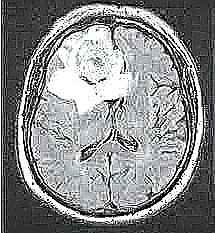

Mostrando: 751.jpg


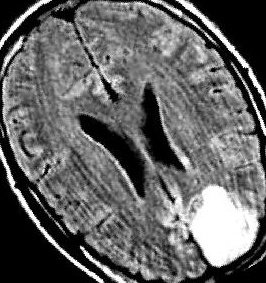

Mostrando: 752.jpg


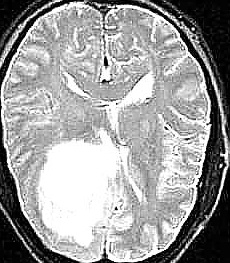

Mostrando: 755.jpg


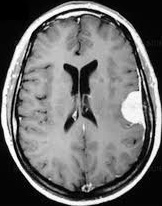

Mostrando: 753.jpg


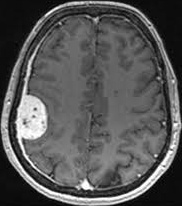

In [17]:
import os
from IPython.display import Image, display

#yes, no, brain_tumor_dataset
folder_path = "/content/gdrive/MyDrive/Datasets/TRAIN_CROP/YES"
files = os.listdir(folder_path)

print("Archivos encontrados:", files)
print(f"cantidad de imagenes: {len(files)}")  # Imprimir los archivos encontrados

count = 0
for file in files:
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        print("Mostrando:", file)  # Imprimir el nombre del archivo que se va a mostrar
        display(Image(filename=os.path.join(folder_path, file)))
        count += 1
        if count == 5:
            break

if count == 0:
    print("No se encontraron imágenes para mostrar.")

#Preprocesamiento


In [18]:
IMG_SIZE = (224,224)

In [19]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

def preprocess_imgs(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array


Para una imagen

In [38]:
'''
from tensorflow.keras.preprocessing import image
import os

def preprocess_imgs(img_path):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
    except Exception as e:
        print(f"Error cargando la imagen {img_path}: {e}")
        return None
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

count = 0
for file in files:
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_array = preprocess_imgs(os.path.join(folder_path, file))
        if img_array is not None:
            print("Mostrando:", file)
            display(Image(filename=os.path.join(folder_path, file)))
            count += 1
            if count == 5:
                break

if count == 0:
    print("No se encontraron imágenes para mostrar.")

'''

'\nfrom tensorflow.keras.preprocessing import image\nimport os\n\ndef preprocess_imgs(img_path):\n    try:\n        img = image.load_img(img_path, target_size=(224, 224))\n    except Exception as e:\n        print(f"Error cargando la imagen {img_path}: {e}")\n        return None\n    img_array = image.img_to_array(img)\n    img_array = np.expand_dims(img_array, axis=0)\n    img_array = preprocess_input(img_array)\n    return img_array\n\ncount = 0\nfor file in files:\n    if file.lower().endswith((\'.png\', \'.jpg\', \'.jpeg\')):\n        img_array = preprocess_imgs(os.path.join(folder_path, file))\n        if img_array is not None:\n            print("Mostrando:", file)  \n            display(Image(filename=os.path.join(folder_path, file)))\n            count += 1\n            if count == 5:\n                break\n\nif count == 0:\n    print("No se encontraron imágenes para mostrar.")\n\n'

In [20]:
#X_train_prep = preprocess_imgs(TRAIN_CROP)
#X_test_prep = preprocess_imgs(TEST_CROP)
#X_val_prep = preprocess_imgs(VAL_CROP)

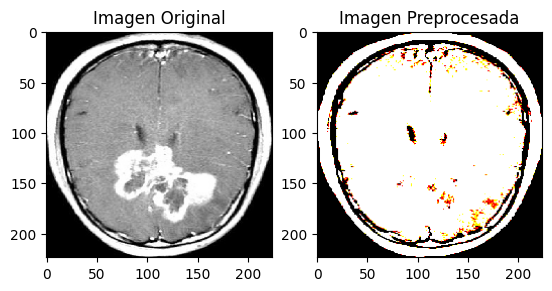

In [21]:
img_path = "/content/gdrive/MyDrive/Datasets/TRAIN_CROP/YES/1000.jpg"

original_img = image.load_img(img_path, target_size=(224, 224))
preprocessed_img = preprocess_imgs(img_path)[0]

plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(preprocessed_img)
plt.title('Imagen Preprocesada')

plt.show()

Para la carpeta de imagenes

Found 1500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


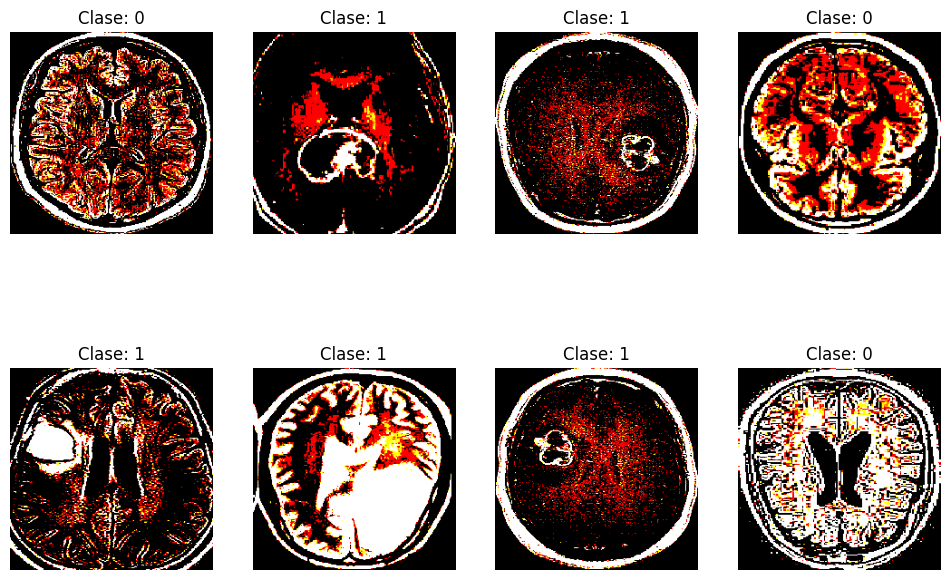

In [22]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    TRAIN_CROP,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    TEST_CROP,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


val_generator = datagen.flow_from_directory(
    VAL_CROP,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

#visualizacion
images, labels = next(train_generator)
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow((images[i] + 1) / 2)
    plt.title(f'Clase: {int(labels[i])}')
    plt.axis('off')
plt.show()

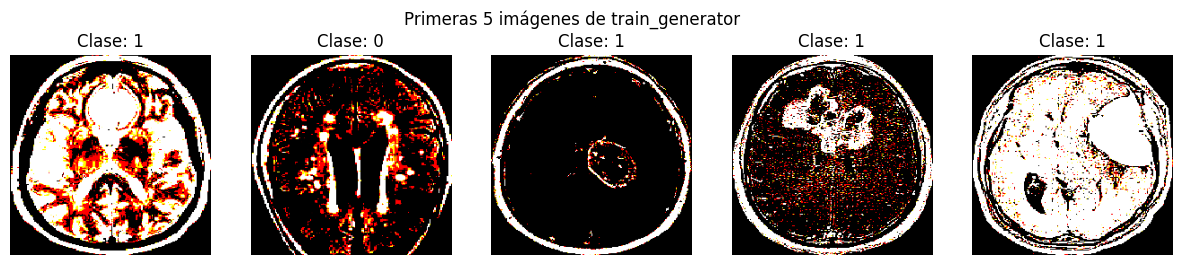

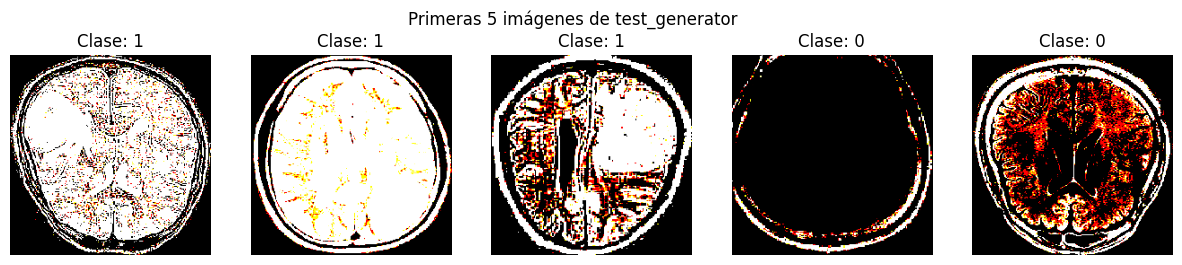

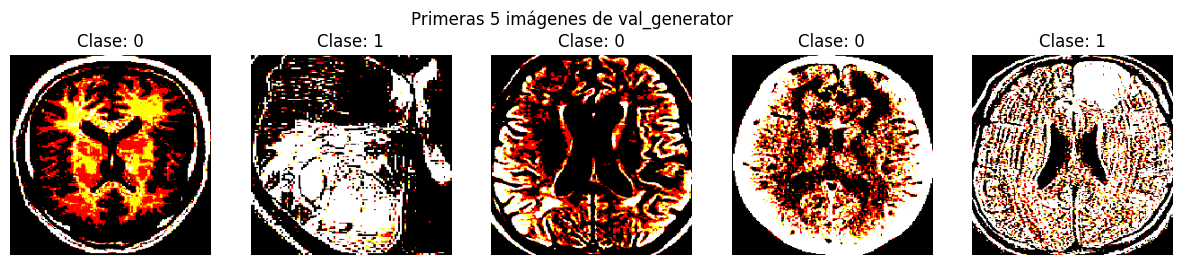

Total de imágenes en train_generator: 1500
Total de imágenes en test_generator: 100
Total de imágenes en val_generator: 400


In [40]:
# Visualizar las primeras 5 imágenes de train_generator
images, labels = next(train_generator)
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow((images[i] + 1) / 2)
    plt.title(f'Clase: {int(labels[i])}')
    plt.axis('off')
plt.suptitle('Primeras 5 imágenes de train_generator')
plt.show()

# Visualizar las primeras 5 imágenes de test_generator
images, labels = next(test_generator)
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow((images[i] + 1) / 2)
    plt.title(f'Clase: {int(labels[i])}')
    plt.axis('off')
plt.suptitle('Primeras 5 imágenes de test_generator')
plt.show()

# Visualizar las primeras 5 imágenes de val_generator
images, labels = next(val_generator)
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow((images[i] + 1) / 2)
    plt.title(f'Clase: {int(labels[i])}')
    plt.axis('off')
plt.suptitle('Primeras 5 imágenes de val_generator')
plt.show()


total_train_images = len(train_generator.filenames)
total_test_images = len(test_generator.filenames)
total_val_images = len(val_generator.filenames)

print(f'Total de imágenes en train_generator: {total_train_images}')
print(f'Total de imágenes en test_generator: {total_test_images}')
print(f'Total de imágenes en val_generator: {total_val_images}')


# Implementacion del modelo

In [23]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping


In [24]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [25]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23589761 (89.99 MB)
Trainable params: 23536641 (89.79 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [27]:
es = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=6
)
#model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[ModelCheckpoint('model.h5', save_best_only=True)])
model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[es])
loss, accuracy = model.evaluate(test_generator)

print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/10
47/47 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.8320

UnknownError: ignored

In [36]:
from PIL import Image, UnidentifiedImageError
import os

image_list = test_generator.filenames.copy()

for image_path in image_list.copy():
    try:
        Image.open(os.path.join(TEST_CROP, image_path))
    except UnidentifiedImageError:
        image_list.remove(image_path)

new_test_generator = datagen.flow_from_directory(
    TEST_CROP,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[es])
loss, accuracy = model.evaluate(new_test_generator)

print(f'Loss: {loss}, Accuracy: {accuracy}')


Found 100 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - ETA: 0s - loss: 0.1695 - accuracy: 0.9413

UnknownError: ignored

In [41]:
TRAIN_DIR = 'TRAIN_CROP/'
VAL_DIR = 'VAL_CROP/'
EPOCHS = 30
es = EarlyStopping(
    monitor='val_accuracy',  # Cambiado de 'val_acc' a 'val_accuracy'
    mode='max',
    patience=6
)

# Calcula el steps_per_epoch adecuado
total_train_images = sum([len(files) for r, d, files in os.walk(TRAIN_DIR)])
total_val_images = sum([len(files) for r, d, files in os.walk(VAL_DIR)])
train_batch_size = 32
val_batch_size = 16
steps_per_epoch = total_train_images // train_batch_size
val_steps = total_val_images // val_batch_size

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=val_steps,  # Usar el valor calculado
    callbacks=[es]
)




Epoch 1/30
47/47 [==============================] - ETA: 0s - loss: 0.0928 - accuracy: 0.9713

UnknownError: ignored

In [ ]:
model.save('resnet_model.keras')